United States of America economic outlook for October, 2023



 

source: https://www.bls.gov/charts/state-employment-and-unemployment/industry-employment-by-state.htm
limitations: data only for non-farming related jobs in the month of October, 2023 seasonally adjusted within the United States of America, not including Puerto Rico

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)
# Study data files
us_path = "data/2023US.csv"
us_data = pd.read_csv(us_path)
pd.set_option('display.float_format', '{:.2f}'.format)

# Display the DataFrame
us_data.head(50)

,State,Total nonfarm,Mining and logging,Construction,Manufacturing,"Trade, transportation, and utilities",Information,Financial activities,Professional and business services,Education and health services,Leisure and hospitality,Other services,Government
0,Alabama,"2,151.50",8.30,100.70,276.2,410.9,23.00,101.60,265.2,258.7,204,102.30,400.6
1,Alaska,328,10.80,16.60,11.6,65.6,4.90,11.50,28.1,52.3,36.6,11.60,78.4
2,Arizona,"3,167.70",14.30,200.00,194.1,606.9,48.50,249.90,470.6,512.9,345.5,95.20,429.8
3,Arkansas,"1,360.70",4.90,65.60,161.6,270.7,11.70,70.60,151.5,208.5,130.8,74.20,210.6
4,California,"18,154.90",20.00,938.40,"1,337.00","3,160.30",572.60,846.80,"2,889.20","3,141.30","2,070.10",591.80,"2,587.40"
5,Colorado,"2,917.70",22.20,178.70,155.1,495.5,76.90,171.00,496.9,360.5,361.9,123.00,476
6,Connecticut,"1,698.70",0.50,61.20,158,302.6,32.00,114.40,223.4,357.5,154.3,63.10,231.7
7,Delaware,486.6,NaN,NaN,28,89.2,3.50,50.00,68.4,81.6,54.1,17.60,69.9
8,District of Columbia,780,NaN,NaN,1,30.6,21.20,28.40,176.3,124.7,77.3,70.90,233.9
9,Florida,"9,824.00",NaN,615.40,422.9,"2,015.20",152.70,690.20,"1,641.00","1,507.70","1,298.40",352.50,"1,122.20"


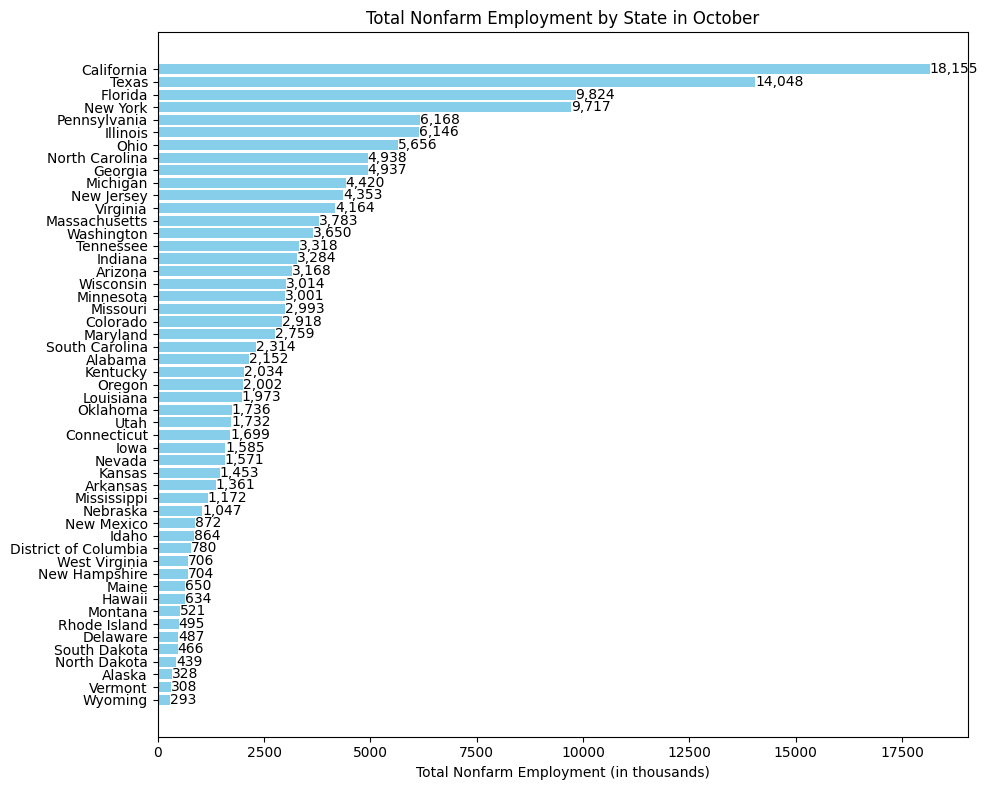

In [5]:
us_data['Total nonfarm'] = pd.to_numeric(us_data['Total nonfarm'].str.replace(',', ''), errors='coerce')
sorted_data = us_data.sort_values('Total nonfarm', ascending=False)

# Create a bar graph with values displayed on each bar
plt.figure(figsize=(10, 8))
bars = plt.barh(sorted_data['State'], sorted_data['Total nonfarm'], color='skyblue')

# Add the data values to each bar
for bar in bars:
    plt.text(
        bar.get_width(),       # get the horizontal position of the text
        bar.get_y() + bar.get_height() / 2,  # get the vertical position of the text
        f'{bar.get_width():,.0f}',  # format the number with a thousand separator
        va='center',  # center alignment
        ha='left'     # left alignment
    )

plt.xlabel('Total Nonfarm Employment (in thousands)')
plt.title('Total Nonfarm Employment by State in October')
plt.gca().invert_yaxis()  # Invert y-axis to have the state with the highest employment at the top
plt.tight_layout()

# Show the bar graph
plt.show()

In [21]:
excluded_columns = ['State', 'Other', 'Non-Industry', 'Columns', 'Total nonfarm', 'Highest Employment Value']
industry_columns = [col for col in us_data.columns if col not in excluded_columns]

# Print the columns to verify
print("Columns being considered for analysis:", industry_columns)

highest_hiring_industry = {}

# Ensure all industry column values are numeric
for column in industry_columns:
    us_data[column] = pd.to_numeric(us_data[column], errors='coerce')

# Iterate over the DataFrame to find the highest hiring industry
for index, row in us_data.iterrows():
    state = row['State']
    max_value = -float('inf')
    max_industry = None

    for industry in industry_columns:
        # Skip NaN values
        if pd.isna(row[industry]):
            continue

        # Compare numeric values
        if row[industry] > max_value:
            max_value = row[industry]
            max_industry = industry

    highest_hiring_industry[state] = (max_industry, max_value)

    # Print the highest industry for each state for verification
    print(f"State: {state}, Highest Industry: {max_industry}, Value: {max_value}")

highest_hiring_industry

Columns being considered for analysis: ['Mining and logging', 'Construction', 'Manufacturing', 'Trade, transportation, and utilities', 'Information', 'Financial activities', 'Professional and business services', 'Education and health services', 'Leisure and hospitality', 'Other services', 'Government', 'Highest Employment Sector']
State: Alabama, Highest Industry: Trade, transportation, and utilities, Value: 410.9
State: Alaska, Highest Industry: Government, Value: 78.4
State: Arizona, Highest Industry: Trade, transportation, and utilities, Value: 606.9
State: Arkansas, Highest Industry: Trade, transportation, and utilities, Value: 270.7
State: California, Highest Industry: Construction, Value: 938.4
State: Colorado, Highest Industry: Professional and business services, Value: 496.9
State: Connecticut, Highest Industry: Education and health services, Value: 357.5
State: Delaware, Highest Industry: Trade, transportation, and utilities, Value: 89.2
State: District of Columbia, Highest In

{'Alabama': ('Trade, transportation, and utilities', 410.9),
 'Alaska': ('Government', 78.4),
 'Arizona': ('Trade, transportation, and utilities', 606.9),
 'Arkansas': ('Trade, transportation, and utilities', 270.7),
 'California': ('Construction', 938.4),
 'Colorado': ('Professional and business services', 496.9),
 'Connecticut': ('Education and health services', 357.5),
 'Delaware': ('Trade, transportation, and utilities', 89.2),
 'District of Columbia': ('Government', 233.9),
 'Florida': ('Financial activities', 690.2),
 'Georgia': ('Professional and business services', 774.8),
 'Hawaii': ('Government', 124.5),
 'Idaho': ('Trade, transportation, and utilities', 164.8),
 'Illinois': ('Education and health services', 976.5),
 'Indiana': ('Trade, transportation, and utilities', 640.0),
 'Iowa': ('Trade, transportation, and utilities', 309.4),
 'Kansas': ('Trade, transportation, and utilities', 274.1),
 'Kentucky': ('Trade, transportation, and utilities', 434.0),
 'Louisiana': ('Trade, 

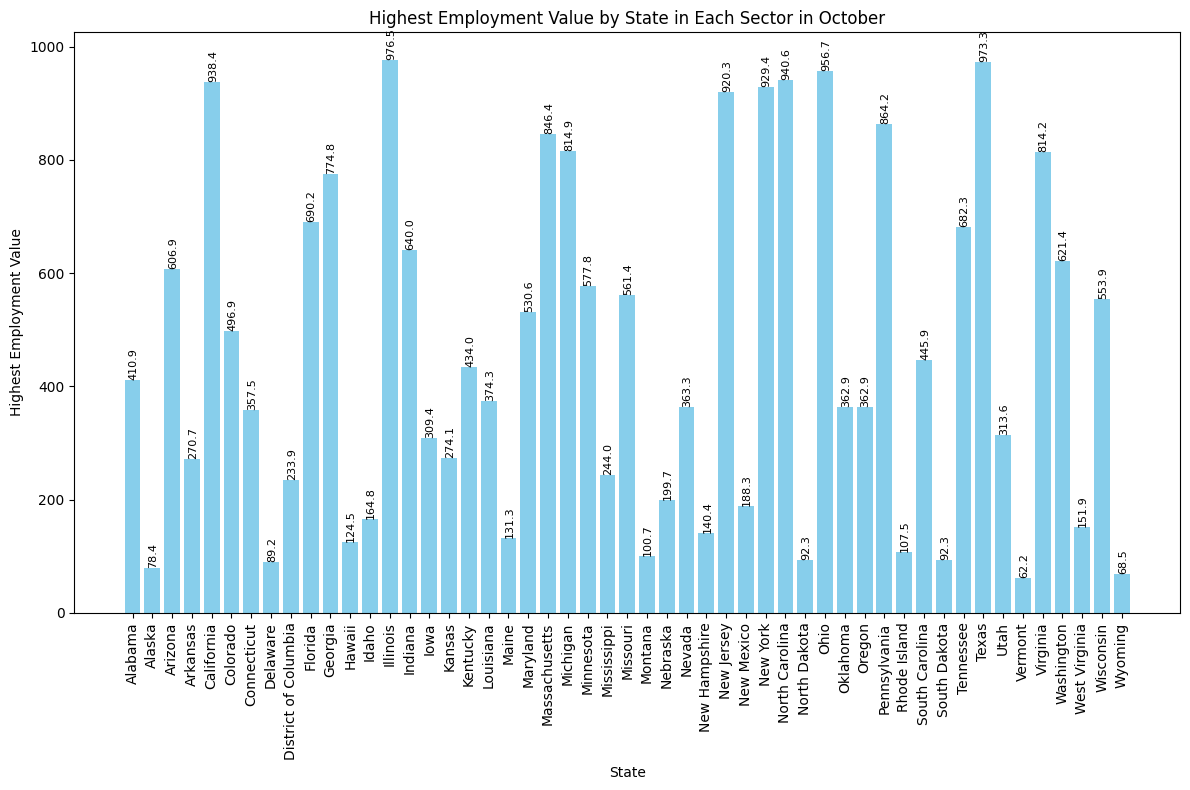

In [24]:
# Initialize the lists for storing the highest sector and its value
highest_sectors = []
highest_values = []

for index, row in us_data.iterrows():
    highest_sector = None
    highest_value = -1

    for sector, value in row.items():
        # Skip the 'State' column or any non-industry column
        if sector == 'State' or sector not in industry_columns:
            continue

        value = pd.to_numeric(value, errors='coerce')
        if pd.isna(value):
            continue

        if value > highest_value:
            highest_value = value
            highest_sector = sector

    highest_sectors.append(highest_sector)
    highest_values.append(highest_value)

# Add the highest values and sectors to the DataFrame
us_data['Highest Employment Sector'] = highest_sectors
us_data['Highest Employment Value'] = highest_values

# Create a bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(us_data['State'], us_data['Highest Employment Value'], color='skyblue')

# Add text labels to each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/4, yval, round(yval, 2), va='bottom', rotation=90, fontsize=8)

# Set labels and title
ax.set_xlabel('State')
ax.set_ylabel('Highest Employment Value')
ax.set_title('Highest Employment Value by State in Each Sector in October')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

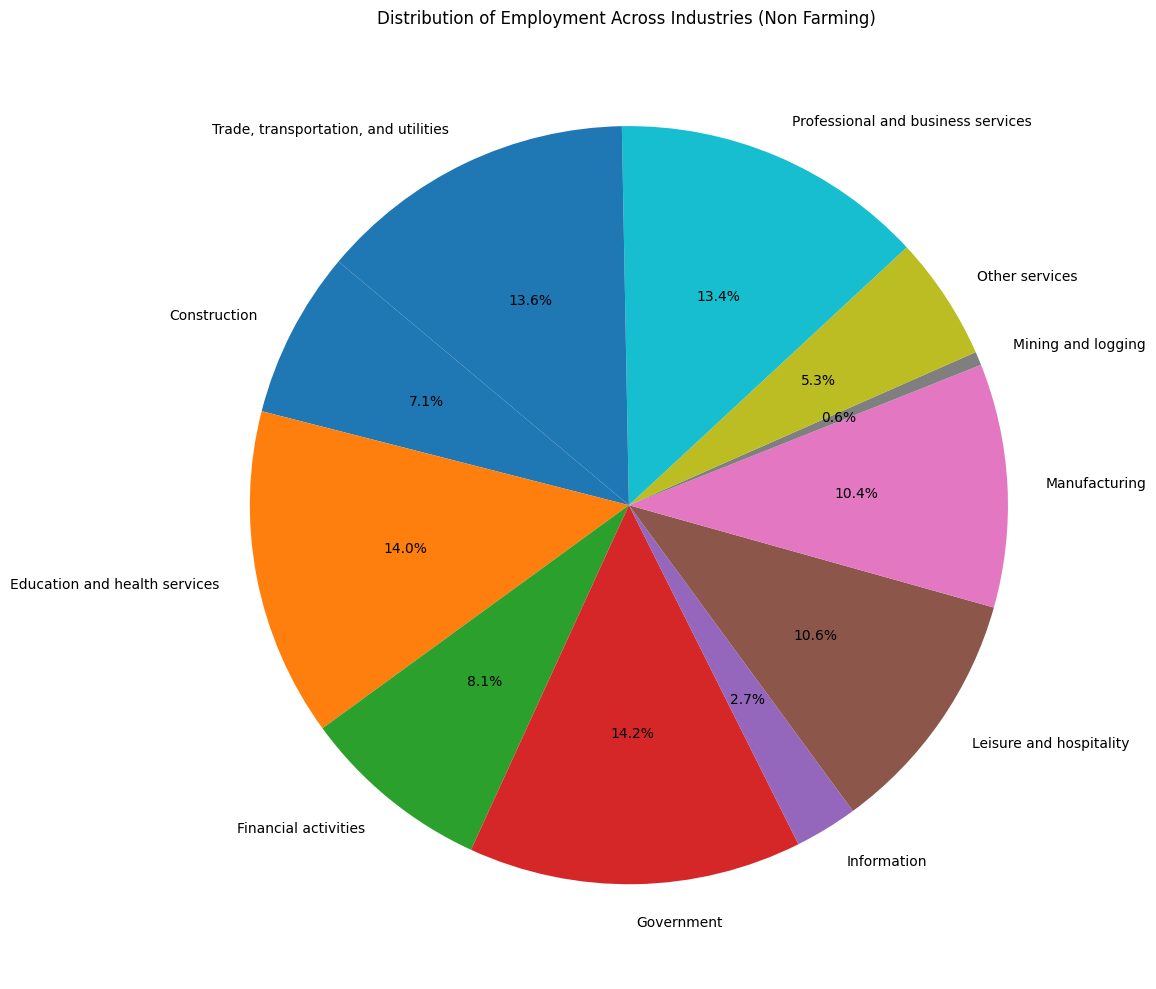

In [26]:
industry_columns = us_data.columns.difference(['State', 'Highest Employment Sector', 'Highest Employment Value', 'Total nonfarm'])

# Aggregate the total employment for each industry
industry_totals = us_data[industry_columns].sum()

# Create a pie chart with percentages
plt.figure(figsize=(12, 10))
plt.pie(industry_totals, labels=industry_totals.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Employment Across Industries (Non Farming) ')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()